In [1]:
import gdown, IPython 
gdown.download('https://drive.google.com/file/d/1vwFKvHsM6Ru6uVfVTiBKgGb_Dx2AGJC0/view?usp=sharing', 'decorated_header.html', quiet=True, fuzzy=True)
IPython.display.HTML(filename="decorated_header.html") # the author of the style: https://codepen.io/juanbrujo/pen/DBKxxM

### **Źródło danych**
Dane pochodzą ze strony ze statystykami europejskimi. Zawierają dane o stopie bezrobocia w krajach Europy z ostatnich 40 lat z podziałem na miesiące i płeć.

https://ec.europa.eu/eurostat/databrowser/view/EI_LMHR_M__custom_6501796/default/table?lang=en

In [2]:
!pip install pycountry 
!pip install mplcursors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 55.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=2805e4a3760a8f644fb3e9c6671badcef41ece5a80fbe7417fbac9fe73f99154
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.0/89.0 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mplcursors: filename=mplcursors-0.5.2-py3-none-any.whl size=21054 sha256=e6f58f7818c8ada2c7163201656f4890c335aeab6919c9322d4bfecd1cbdf1f2
  Store

In [3]:
import csv 
import gdown
data_url = 'https://drive.google.com/file/d/1ENvBeNA-9T1tRu56dNsn5DkWaj2py3rj/view?usp=sharing'
data_file = 'prepared_data.csv'
gdown.download(data_url, data_file, quiet=True, fuzzy=True)


'prepared_data.csv'

In [4]:
import pycountry

# Funkcja zamieniająca kody krajów na pełne nazwy
def code_to_name(country_code):
    try:
        country = pycountry.countries.get(alpha_2=country_code)
        return country.name
    except:
        return country_code

In [5]:
# Funkcja wywołująca funkcję zmiany kodów krajów na pełne nazwy
def mapCountryCode(df):
    df.loc[:,"geo"] = df.loc[:,"geo"].apply(code_to_name)

In [22]:
import pandas as pd
# Wczytaj dane z pliku CSV
df = pd.read_csv('prepared_data.csv')

# Wybieram dane łączone, bez podziału na płeć
df = df.query("indic == 'LM-UN-T-TOT'").reset_index(drop=True)

df = df[['geo', 'TIME_PERIOD', 'OBS_VALUE']]

mapCountryCode(df)
df['geo'] = df['geo'].replace('EL', 'Greece')

df


,geo,TIME_PERIOD,OBS_VALUE
0,Austria,1994-01,5.2
1,Austria,1994-02,5.2
2,Austria,1994-03,4.7
3,Austria,1994-04,4.4
4,Austria,1994-05,4.2
...,...,...,...
22280,UK,2020-05,3.8
22281,UK,2020-06,4.0
22282,UK,2020-07,4.4
22283,UK,2020-08,4.7


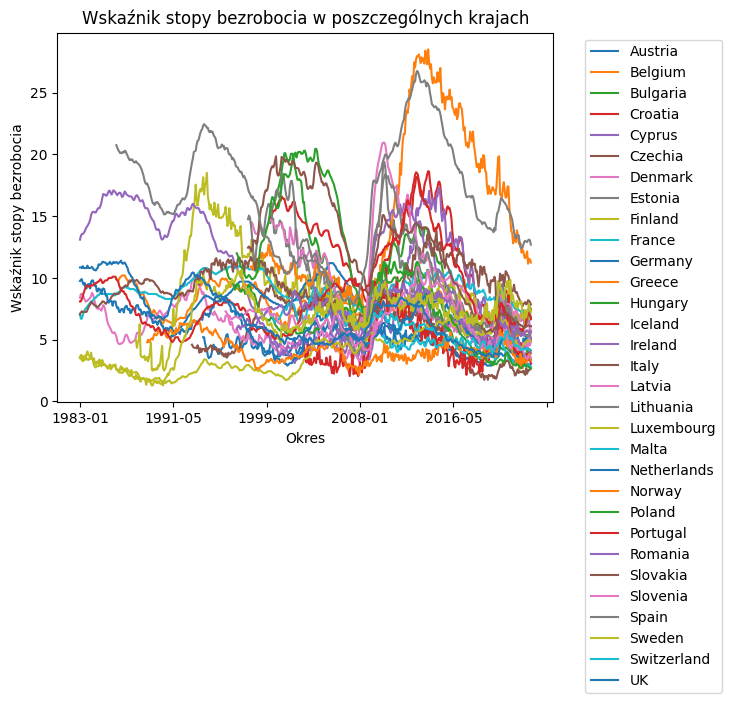

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Przekształcam dane, aby kolumna 'TIME_PERIOD' była indeksem, a 'geo' była kolumną
df = df.pivot_table(index='TIME_PERIOD', columns='geo', values='OBS_VALUE')

# Wyświetlenie wykresu
df.plot(kind='line', marker='')
plt.xlabel('Okres')
plt.ylabel('Wskaźnik stopy bezrobocia')
plt.title('Wskaźnik stopy bezrobocia w poszczególnych krajach')

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

### **Wyświetlenie wykresu liniowego dla każdego kraju z osobna**

In [24]:
import ipywidgets as widgets

df_separate = pd.read_csv('prepared_data.csv')

df_separate = df_separate.query("indic == 'LM-UN-F-TOT'").reset_index(drop=True)

mapCountryCode(df_separate)
df_separate['geo'] = df_separate['geo'].replace('EL', 'Greece')

get_year = lambda x: int(x.split('-')[0])

# Dodaję kolumnę 'Year' bazującą na roku z kolumny 'TIME_PERIOD'
df_separate['year'] = df_separate['TIME_PERIOD'].apply(get_year)

df_separate = df_separate[['geo', 'year', 'TIME_PERIOD', 'OBS_VALUE']]

df_separate = df_separate.pivot_table(index='TIME_PERIOD', columns='geo', values='OBS_VALUE')

# Funkcja wywoływana po zmianie wartości dropdown
def update_plot(country):
    plt.cla()
    df_separate[country].plot(kind='line', marker='')
    plt.xlabel('Okres')
    plt.ylabel('Wskaźnik stopy bezrobocia')
    plt.title('Wskaźnik stopy bezrobocia w poszczególnych krajach - {}'.format(country))
    plt.legend(loc='best')
    plt.show()

# Tworzenie dropdown z wyborem kraju
country_dropdown = widgets.Dropdown(options=df_separate.columns, description='Kraj')

# Wywołanie funkcji update_plot przy zmianie wartości dropdown
widgets.interact(update_plot, country=country_dropdown)

interactive(children=(Dropdown(description='Kraj', options=('Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cypr…

<function __main__.update_plot(country)>

### **Dodatkowa funkcja do wykresów zrobionych w plotly**
https://stackoverflow.com/questions/47230817/plotly-notebook-mode-with-google-colaboratory/54771665#54771665

In [9]:
def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
  init_notebook_mode(connected=False)

### **Wykres bąbelkowy**
Dane z co czterech lat począwszy od 1983 roku

In [25]:
import pandas as pd
import plotly.express as px
%matplotlib inline
enable_plotly_in_cell()

df_bubble = pd.read_csv('prepared_data.csv')

df_bubble = df_bubble.query("indic == 'LM-UN-T-TOT'").reset_index(drop=True)

get_year = lambda x: int(x.split('-')[0])
df_bubble['year'] = df_bubble['TIME_PERIOD'].apply(get_year)

df_bubble = df_bubble[['geo', 'year', 'OBS_VALUE']]

df_bubble = df_bubble.groupby(['geo', 'year'], as_index=False).mean().round(2)
df_bubble.rename(columns={'OBS_VALUE': 'average'}, inplace=True)

# Odjęcie wartości 3 od roku bazowego
df_bubble['Adjusted_Year'] = df_bubble['year'] - 3

# Pozostawienie tylko danych z co czwartego kolejnego roku
df_bubble = df_bubble[df_bubble['Adjusted_Year'] % 4 == 0]

# Usunięcie dodatkowej kolumny
df_bubble = df_bubble.drop('Adjusted_Year', axis=1)


mapCountryCode(df_bubble)
df_bubble['geo'] = df_bubble['geo'].replace('EL', 'Greece')

# Pozbywam się brakujących wartości i tworzę wykres bąbelkowy
df_bubble = df_bubble.dropna(subset=['average'])
fig = px.scatter(df_bubble, x='year', y='geo', size='average', color='geo', hover_name='geo')
fig.update_traces(showlegend=False)


fig.update_layout(
    xaxis_title='Rok',
    yaxis_title='Kraj',
    title='Wykres bąbelkowy: Średnia wartość stopy bezrobocia',
    autosize=False,
    width=800,
    height=1100
)

fig.show()

Output hidden; open in https://colab.research.google.com to view.

### **Treemap z wyborem roku**

In [11]:
import pandas as pd

df_tree = pd.read_csv('prepared_data.csv')

df_tree = df_tree.query("indic == 'LM-UN-T-TOT'").reset_index(drop=True)

get_year = lambda x: int(x.split('-')[0])
df_tree['year'] = df_tree['TIME_PERIOD'].apply(get_year)

df_tree = df_tree[['geo', 'year', 'OBS_VALUE']]
df_tree = df_tree.groupby(['geo', 'year'], as_index=False).mean().round(2)
df_tree.rename(columns={'OBS_VALUE': 'average'}, inplace=True)

# df_tree = df_tree.query("year >= 2008").reset_index(drop=True)

mapCountryCode(df_tree)
df_tree['geo'] = df_tree['geo'].replace('EL', 'Greece')

df_tree

,geo,year,average
0,Austria,1994,4.24
1,Austria,1995,4.24
2,Austria,1996,4.72
3,Austria,1997,4.75
4,Austria,1998,4.72
...,...,...,...
971,UK,2016,4.82
972,UK,2017,4.35
973,UK,2018,4.02
974,UK,2019,3.75


Szukam roku dla którego dostępne były dane od wszystkich krajów i dla którego suma stóp bezrobocia w krajach UE była największa

In [12]:
# Zliczanie liczby wierszy dla każdego roku
df_tree['rows_per_year'] = df_tree.groupby('year')['geo'].transform('count')

# Sortowanie dataframe według roku
df_sorted = df_tree[df_tree['rows_per_year'] == 31].sort_values('year')

df_sorted['year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [13]:
# Wybranie tylko wierszy z odpowiednimi latami
df_tree = df_tree[df_tree['year'].isin(df_sorted['year'].unique())]

df_tree.groupby('year')['average'].sum().idxmax()

2013

In [14]:
import plotly.express as px
from ipywidgets import interact

enable_plotly_in_cell()

# Tworzenie rozwijalnej listy rocznych wartości
years = df_tree['year'].unique()

def update_chart(year):
    # Wybieramy dane dla danego roku
    selected_data = df_tree[df_tree['year'] == year]
    
    # Tworzymy wykres treemap
    fig = px.treemap(selected_data, path=['geo'], values='average', color='average',
                      color_continuous_scale=px.colors.sequential.YlOrRd)

    fig.update_layout(height=500, width=900, title_text=f"Średnia wartość stopy bezrobocia w roku: {year}")
    fig.update_traces(textposition='middle center') 
    fig.show()

# Interaktywny wybór roku
interact(update_chart, year=years)

Output hidden; open in https://colab.research.google.com to view.

### **Analiza miesięczna - wykresy słupkowe**

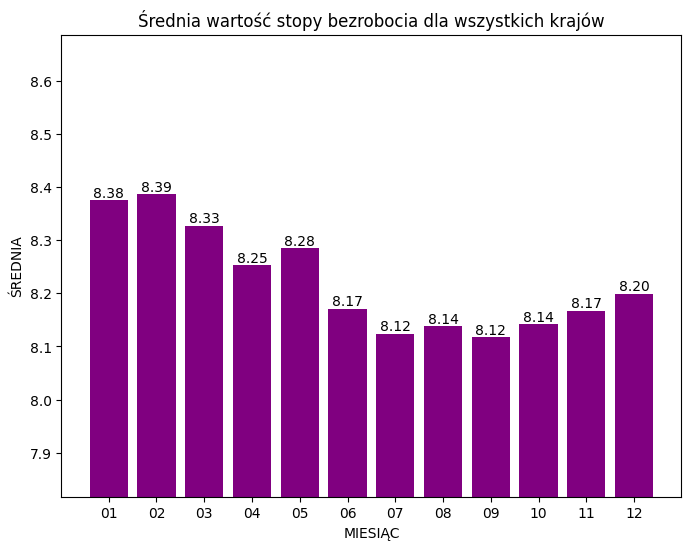

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df_monthly = pd.read_csv('prepared_data.csv')

df_monthly = df_monthly.query("indic == 'LM-UN-T-TOT'").reset_index(drop=True)

# df = df.query("TIME_PERIOD >= '2013-01'").reset_index(drop=True)

mapCountryCode(df_monthly)
df_monthly['geo'] = df_monthly['geo'].replace('EL', 'Greece')

# Dodaję kolumnę 'month' bazującą na roku z kolumny 'TIME_PERIOD'
get_month = lambda x: x.split('-')[1]
df_monthly['month'] = df_monthly['TIME_PERIOD'].apply(get_month)


df_monthly = df_monthly[['geo', 'month', 'OBS_VALUE']]
df_monthly = df_monthly.groupby(['month'], as_index=False)['OBS_VALUE'].mean()


# Tworzenie wykresu słupkowego
fig, ax = plt.subplots(figsize=(8, 6))

# Rysowanie słupków
ax.bar(df_monthly['month'], df_monthly['OBS_VALUE'], color='purple')

# Dodanie etykiet do słupków
for month, obs_value in zip(df_monthly['month'], df_monthly['OBS_VALUE']):
    ax.text(month, obs_value, f'{obs_value:.2f}', ha='center', va='bottom')

ax.set_title('Średnia wartość stopy bezrobocia dla wszystkich krajów')
ax.set_xlabel('MIESIĄC')
ax.set_ylabel('ŚREDNIA')
ax.set_ylim(min(df_monthly['OBS_VALUE']) - 0.3, max(df_monthly['OBS_VALUE']) + 0.3)

plt.show()

In [26]:
import pandas as pd
import plotly.graph_objects as go
from ipywidgets import interact

enable_plotly_in_cell()

df_mon_sep = pd.read_csv('prepared_data.csv')

df_mon_sep = df_mon_sep.query("indic == 'LM-UN-T-TOT'").reset_index(drop=True)

#df = df.query("TIME_PERIOD >= '2013-01'").reset_index(drop=True)

mapCountryCode(df_mon_sep)
df_mon_sep['geo'] = df_mon_sep['geo'].replace('EL', 'Greece')

get_month = lambda x: x.split('-')[1]
df_mon_sep['month'] = df_mon_sep['TIME_PERIOD'].apply(get_month)


df_mon_sep = df_mon_sep[['geo', 'month', 'OBS_VALUE']]

df_mon_sep = df_mon_sep.groupby(['geo', 'month'], as_index=False)['OBS_VALUE'].mean()

def create_bar_chart(country):
    filtered_data = df_mon_sep[df_mon_sep['geo'] == country]

    fig = go.Figure(data=[
        go.Bar(
            x=filtered_data['month'],
            y=filtered_data['OBS_VALUE'],
            marker=dict(color=df_mon_sep['OBS_VALUE'], colorscale='Viridis'),
            text=filtered_data['OBS_VALUE'].round(2),
            textposition='outside',
            hovertemplate='MIESIĄC: %{x}<br>ŚREDNIA: %{y:.2f}<extra></extra>'
        )
    ])

    fig.update_layout(
        title=f'Wykres słupkowy stopy bezrobocia dla kraju: {country}',
        xaxis_title='MIESIĄC',
        yaxis_title='ŚREDNIA WARTOŚĆ STOPY',
        # Zmiana zakresu osi Y
        yaxis=dict(range=[min(filtered_data['OBS_VALUE']) - 0.3, max(filtered_data['OBS_VALUE']) + 0.3]),  
        showlegend=False
    )

    fig.show()
  
interact(create_bar_chart, country=df_mon_sep['geo'].unique())

Output hidden; open in https://colab.research.google.com to view.

In [17]:
max_diff = df_mon_sep.groupby('geo')['OBS_VALUE'].agg(lambda x: max(x) - min(x))
max_diff = max_diff.sort_values(ascending=False)
print(max_diff)

geo
Iceland        2.010000
Finland        1.765714
Croatia        0.907065
Greece         0.866000
Cyprus         0.712591
Lithuania      0.682000
Austria        0.681207
Italy          0.662652
Estonia        0.604710
Bulgaria       0.604529
Sweden         0.520000
Poland         0.491595
Ireland        0.452500
Denmark        0.433994
Netherlands    0.426951
Hungary        0.410913
Latvia         0.380000
Slovenia       0.375992
Romania        0.361396
Belgium        0.360811
Switzerland    0.340934
France         0.334731
Norway         0.323529
Portugal       0.295758
Slovakia       0.292769
Spain          0.286486
Luxembourg     0.260366
Czechia        0.185484
UK             0.185313
Germany        0.185167
Malta          0.176087
Name: OBS_VALUE, dtype: float64


### **Porównanie stopy bezrobocia ze względu na płeć**

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

df_gender = pd.read_csv('prepared_data.csv')

df_gender = df_gender.drop(df_gender[df_gender['indic'] == 'LM-UN-T-TOT'].index).reset_index(drop=True)

mapCountryCode(df_gender)
df_gender['geo'] = df_gender['geo'].replace('EL', 'Greece')

get_year = lambda x: x.split('-')[0]
df_gender['year'] = df_gender['TIME_PERIOD'].apply(get_year)
df_gender = df_gender[['indic', 'geo', 'year', 'OBS_VALUE']]

# loc - dostęp do wierszy i kolumn; [lokalizacja wierszy, wybór kolumny]
df_gender.loc[df_gender['indic'] == 'LM-UN-F-TOT', 'indic'] = 'Female'
df_gender.loc[df_gender['indic'] == 'LM-UN-M-TOT', 'indic'] = 'Male'

df_gender = df_gender.groupby(['indic', 'year'])['OBS_VALUE'].mean().reset_index().round(2)

df_gender

,indic,year,OBS_VALUE
0,Female,1983,9.56
1,Female,1984,9.78
2,Female,1985,9.87
3,Female,1986,11.36
4,Female,1987,11.81
...,...,...,...
77,Male,2019,5.73
78,Male,2020,6.63
79,Male,2021,6.31
80,Male,2022,5.39


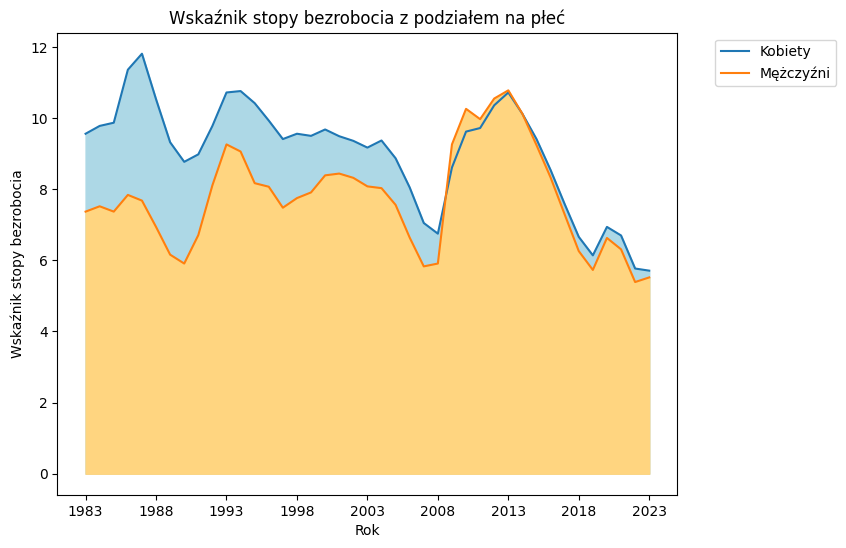

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Przekształcam dane, aby kolumna 'TIME_PERIOD' była indeksem, a 'geo' była kolumną
df_gender_plot = df_gender.pivot_table(index='year', columns='indic', values='OBS_VALUE')

plt.figure(figsize=(8, 6))
df_gender_plot['Female'].plot(kind='line', marker='', label='Kobiety')
df_gender_plot['Male'].plot(kind='line', marker='', label='Mężczyźni')

# Wypełnienie pola pod wykresami
plt.fill_between(df_gender_plot.index, df_gender_plot['Female'], color='lightblue')
plt.fill_between(df_gender_plot.index, df_gender_plot['Male'], color='#FFD580')

plt.xlabel('Rok')
plt.ylabel('Wskaźnik stopy bezrobocia')
plt.title('Wskaźnik stopy bezrobocia z podziałem na płeć')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

plt.show()

### **Wizualizacja róźnicy**
Można grupować po 'year' i 'indic' ale trudno obliczyć wtedy różnicę dlatego tworzę osobne tabele 'Female' i 'Male', które potem łączę.

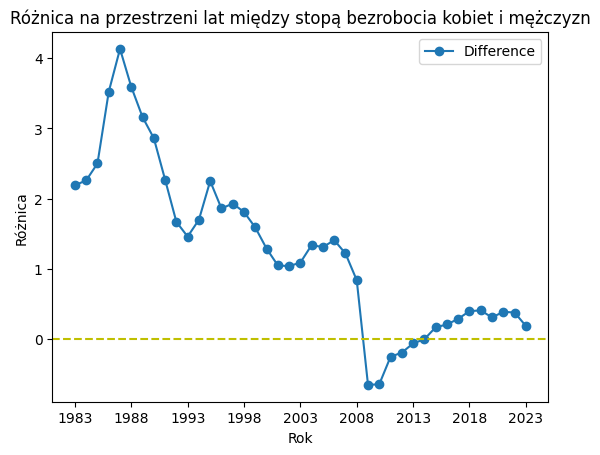

In [27]:
# Tworzenie tabeli Female
df_female = df_gender[df_gender['indic'] == 'Female'].set_index('year')
df_female = df_female.rename(columns={'OBS_VALUE': 'Female'})

# Tworzenie tabeli Male
df_male = df_gender[df_gender['indic'] == 'Male'].set_index('year')
df_male = df_male.rename(columns={'OBS_VALUE': 'Male'})

# Łączenie tabel Female i Male
df_merged = pd.merge(df_female, df_male, left_index=True, right_index=True)

df_merged['Difference'] = df_merged['Female'] - df_merged['Male']

df_merged.reset_index(inplace=True)
df_merged = df_merged[['year', 'Difference']]


# Tworzenie wykresu
df_merged.plot(x='year', y='Difference', marker='o')
plt.axhline(y=0, color='y', linestyle='--')

plt.xlabel('Rok')
plt.ylabel('Różnica')
plt.title('Różnica na przestrzeni lat między stopą bezrobocia kobiet i mężczyzn')

#plt.ylim(-4.5, 4.5)

plt.show()